# **COMP9727 Recommender Systems**
## Assignment 1

Student Name: Yiteng Guo

Student ID: z5563711

### Part 1: Topic Classification

#### Question 1:
1. After analysing the dataset, I found that there are regular characters that we need to keep in order to secure the completeness of expression. Therefore, I have decided to extend the regex provided in the tutorial by adding the characters ' and - to ensure it. The final regex would be re.sub(r"[^\w\s'-]", "", text).
2. We can use KFold, a cross-validation method, to fix the second mistake. Also, as the dataset provided has an imbalanced distribution of categorical data, StratifiedKFold is an appropriate approach to solve such problem. Thus, I have decided to utilize StratifiedKFold with 5 folds to fix the second mistake, and the final code would be StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2).

PS: The fixing codes are highlighted in the relevant answers.

#### Question 2:
##### Preprocessing Steps Summary
1. Lowercasting: The aim of this step is to lower all characters, and it must be done before character cleaning in order to avoid mistaken deletion.
2. Regular Expressions: The aim of this step is to remove all characters except letters, digits, underscores, whitespace characters, apostrophes, and hyphens in order to fit regular expression of English.
3. Tokenization: The aim of this step is to transform data to meaningful words based on the defination of those texts by using NLTK.
4. Stopword Removal: The aim of this step is to handle the stopwords by utilizing NLTK.
6. Stemming: The aim of this step is to stem the words by using PorterStemmer.

In [118]:
import re
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("punkt")
stp_set = set(stopwords.words("english"))
ps = PorterStemmer()

def preprocess(txt): # Following what I learned from week2 tutorial
    txt = txt.lower()
    txt = re.sub(r"[^\w\s'-]", "", txt) # The highlighted code of fixing the first mistake mentioned in the Question 1
    tk = word_tokenize(txt)
    remove_stop = []
    for i in tk:
        if i not in stp_set:
            remove_stop.append(i)
    stem_list = []
    for i in remove_stop:
        cur_stem = ps.stem(i)
        stem_list.append(cur_stem)
    return " ".join(stem_list)

df = pd.read_csv("dataset.tsv", sep = "\t")
label = list(df["topic"])
df["all_txt"] = (df["artist_name"].astype(str) + " " + df["track_name"].astype(str) + " " + df["release_date"].astype(str) + " " + df["genre"].astype(str) + " " + df["lyrics"].astype(str))
content = list(df["all_txt"])
dt_cvt = CountVectorizer(preprocessor = preprocess)

# The highlighted code of fixing the second mistake mentioned in the Question 1 (Stratified 5 folds for cross-validation)
stf_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2) # 5 fold, shuffle for generalization, regular random_state of 2

# Develop a MNB
mnb_pl = make_pipeline(dt_cvt, MultinomialNB())

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/davidguo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidguo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/davidguo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Question 3:
1. According to the diagram, the distribution of labels is imbalanced. Thus, macro f1-score is an appropriate selection as my primary metric. As accuracy might be misled by the majority categories and weighted f1-score has a risk to ignore minority categories. Therefore, I choose f1-macro as the primary metric for evaluation, because such metric can fairly treat all categories and is not influenced by imbalanced distribution of labels.
2. Based on the classification report tables, the performance of MNB is greater than BNB, where MNB has a macro f1-score of 0.75, and BNB's macro f1-score only reaches 0.34. Also, the BNB table shows that it cannot effectively predict minority categories; for example, the "emotion" class receives a score of 0. Thus, MNB is superior.

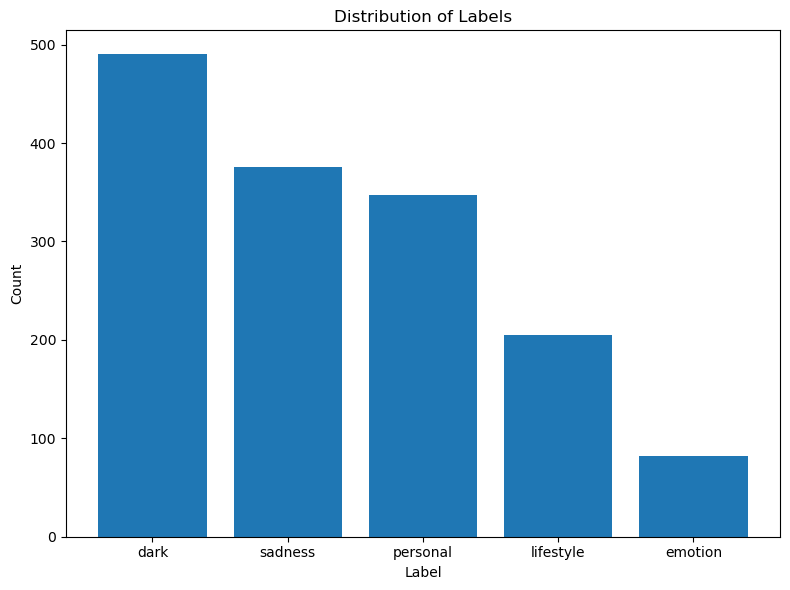

Classification Report Table of MNB:
              precision    recall  f1-score   support

        dark       0.80      0.83      0.82       490
     emotion       0.94      0.37      0.53        82
   lifestyle       0.87      0.70      0.77       205
    personal       0.84      0.84      0.84       347
     sadness       0.73      0.87      0.80       376

    accuracy                           0.80      1500
   macro avg       0.84      0.72      0.75      1500
weighted avg       0.81      0.80      0.80      1500

Classification Report Table of BNB:
              precision    recall  f1-score   support

        dark       0.63      0.77      0.69       490
     emotion       0.00      0.00      0.00        82
   lifestyle       0.80      0.02      0.04       205
    personal       0.68      0.32      0.44       347
     sadness       0.42      0.82      0.56       376

    accuracy                           0.53      1500
   macro avg       0.51      0.39      0.34      1500
weigh

In [120]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

label_count = df["topic"].value_counts()
plt.figure(figsize = (8, 6))
plt.bar(label_count.index, label_count.values)
plt.title("Distribution of Labels")
plt.ylabel("Count")
plt.xlabel("Label")
plt.tight_layout()
plt.show()

# Multinomial Naive Bayes Score

mnb_cv = cross_validate(mnb_pl, content, label, cv = stf_kfold, scoring = "f1_macro")
mnb_fc = mnb_cv["test_score"].mean()

# Develop a Bernoulli Naive Bayes with its Scores

bnb_pl = make_pipeline(dt_cvt, BernoulliNB())
bnb_cv = cross_validate(bnb_pl, content, label, cv = stf_kfold, scoring = "f1_macro")
bnb_fc = bnb_cv["test_score"].mean()

# Compare MNB with BNB
y_pred_m = cross_val_predict(mnb_pl, content, label, cv = stf_kfold)
print("Classification Report Table of MNB:")
print(classification_report(label, y_pred_m, zero_division = 0))

y_pred_b = cross_val_predict(bnb_pl, content, label, cv = stf_kfold)
print("Classification Report Table of BNB:")
print(classification_report(label, y_pred_b, zero_division = 0))

print(f"MNB Macro F1-score: {mnb_fc:.2f}")
print(f"BNB Macro F1-score: {bnb_fc:.2f}")

#### Question 4:
1. According to the experimental result table, we can see that the best value for N is 400, because it causes the highest macro f1-score of 0.847, which means that the model performs best by using the top 400 most frequent words.
2. In addition, the diagram shows that the macro f1-score keeps decreasing after the best value of N = 400. Thus I choose to use the value of 400 as the best N for the rest of assignment.

Experimental Result Table:
N: 100, Macro F1-score: 0.728
N: 200, Macro F1-score: 0.801
N: 300, Macro F1-score: 0.838
N: 400, Macro F1-score: 0.847
N: 500, Macro F1-score: 0.844
N: 600, Macro F1-score: 0.836
N: 700, Macro F1-score: 0.840
N: 800, Macro F1-score: 0.836
N: 900, Macro F1-score: 0.832
N: 1000, Macro F1-score: 0.831
N: All, Macro F1-score: 0.749
Best N: 400, Macro F1-score: 0.847


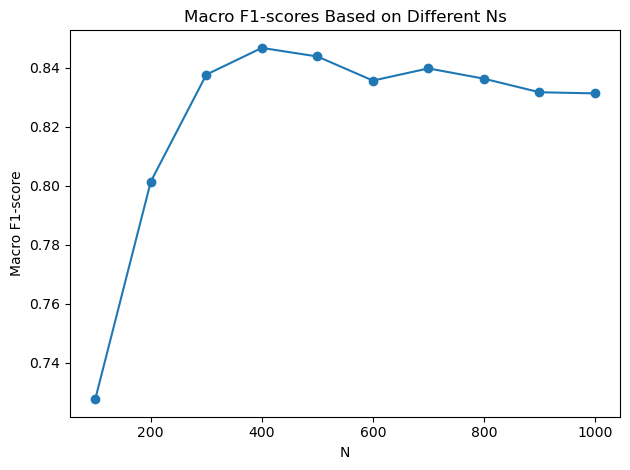

In [122]:
N_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, None]
mf1_list = []
loop_check = False
best_N = []
print("Experimental Result Table:")
for N in N_list:
    cur_cvt = CountVectorizer(preprocessor = preprocess, max_features = N)
    cur_mnb_pl = make_pipeline(cur_cvt, MultinomialNB())
    cur_mnb_cv = cross_validate(cur_mnb_pl, content, label, cv = stf_kfold, scoring = "f1_macro")
    fs_cur = cur_mnb_cv["test_score"].mean()
    mf1_list.append(fs_cur)
    if loop_check == False:
        best_N = [N, fs_cur]
    loop_check = True
    if fs_cur > best_N[1]:
        best_N = [N, fs_cur]
    print(f"N: {"All" if N is None else N}, Macro F1-score: {fs_cur:.3f}")
print(f"Best N: {best_N[0]}, Macro F1-score: {best_N[1]:.3f}")
plt.figure()
plt.plot(N_list, mf1_list, marker = "o")
plt.xlabel("N")
plt.ylabel("Macro F1-score")
plt.title("Macro F1-scores Based on Different Ns")
plt.tight_layout()
plt.show()

#### Question 5:
1. I choose to use Logistic Regression as my additional classification method. This method is a linear model, which performs well on high-dimensional data, and such method is particularly suitable for text classification task. For example, although the dataset provided only has 1500 samples, the feature space is high-dimensional after text vectorization, and this assignment is a typical text classification task. Thus, Logistic Regression is an appropriate method for this task.
2. As the dataset provided is considered as a small dataset that has only 1500 samples, and the feature space is high-dimensional and representation becomes sparse after text vectorization, I decided to set solver to "liblinear" in order to handle the small dataset and set max_iter to 800 for ensuring convergence.
3. For a concrete hypothesis, I plan to compare Logistic Regression with BNB and MNB based on their overall macro F1-scores. In addition, the F1-scores for minority classes are particularly important due to the class imbalance in the dataset. I think Logistic Regression might be better than BNB and MNB, because Logistic Regression does not rely on feature independence and has more potential to identify features in sparse data. This fully matches the characteristics of the current dataset.
4. According to the experimental results of MNB, BNB, Logistic Regression, the overall macro f1-score of Logistic Regression is 0.852, which is better than that of MNB and BNB (0.847 and 0.556). Furthermore, Logistic Regression performs more evenly on both majority and minority categories. For example, Logistic Regression achieves a f1-score of 0.79 on the "emotion" type, which has the least samples, and this is better than MNB and BNB (0.75 and 0.21). In addition, Logistic Regression achieves an f1-score of 0.87 on the "dark" type, which has the most samples. This is better than BNB (0.74) and similar to MNB (0.88).
5. In conclusion, from a comprehensive perspective, Logistic Regression is the best and most balanced model among the three based on the analysis and evaluation above. It not only performs best on minority classes, but also performs well on majority classes. Therefore, I decided to choose Logistic Regression as my final model, using max_features = 400 in CountVectorizer and solver = "liblinear", max_iter = 800 in LogisticRegression as the main hyperparameters.

In [124]:
from sklearn.linear_model import LogisticRegression

# Update Top N to 400
new_cvt = CountVectorizer(preprocessor = preprocess, max_features = 400)

# Develop a Multinomial Naive Bayes with its Scores
mnb_pl = make_pipeline(new_cvt, MultinomialNB())
mnb_cv = cross_validate(mnb_pl, content, label, cv = stf_kfold, scoring = "f1_macro")
mnb_fc = mnb_cv["test_score"].mean()

# Develop a Bernoulli Naive Bayes with its Scores
bnb_pl = make_pipeline(new_cvt, BernoulliNB())
bnb_cv = cross_validate(bnb_pl, content, label, cv = stf_kfold, scoring = "f1_macro")
bnb_fc = bnb_cv["test_score"].mean()

# Develop a Logistic Regression with its Scores
lr_pl = make_pipeline(new_cvt, LogisticRegression(solver = "liblinear", max_iter = 800))
lr_cv = cross_validate(lr_pl, content, label, cv = stf_kfold, scoring = "f1_macro")
lr_fc = lr_cv["test_score"].mean()

# Compare LR with MNB and BNB
y_pred_m = cross_val_predict(mnb_pl, content, label, cv = stf_kfold)
print("Classification Report Table of MNB:")
print(classification_report(label, y_pred_m, zero_division = 0))

y_pred_b = cross_val_predict(bnb_pl, content, label, cv = stf_kfold)
print("Classification Report Table of BNB:")
print(classification_report(label, y_pred_b, zero_division = 0))

y_pred_lr = cross_val_predict(lr_pl, content, label, cv = stf_kfold)
print("Classification Report Table of LR:")
print(classification_report(label, y_pred_lr, zero_division = 0))

print(f"MNB Macro F1-score: {mnb_fc:.3f}")
print(f"BNB Macro F1-score: {bnb_fc:.3f}")
print(f"Logistic Regression Macro F1-score: {lr_fc:.3f}")

Classification Report Table of MNB:
              precision    recall  f1-score   support

        dark       0.87      0.89      0.88       490
     emotion       0.76      0.73      0.75        82
   lifestyle       0.87      0.83      0.85       205
    personal       0.89      0.89      0.89       347
     sadness       0.86      0.87      0.87       376

    accuracy                           0.87      1500
   macro avg       0.85      0.84      0.85      1500
weighted avg       0.87      0.87      0.87      1500

Classification Report Table of BNB:
              precision    recall  f1-score   support

        dark       0.70      0.78      0.74       490
     emotion       0.29      0.17      0.21        82
   lifestyle       0.50      0.54      0.52       205
    personal       0.68      0.64      0.66       347
     sadness       0.67      0.64      0.65       376

    accuracy                           0.65      1500
   macro avg       0.57      0.55      0.56      1500
weigh

### Part 2: Recommendation Methods

#### Question 1:
##### Comment:
1. For users 1 and 2, their keywords seem reasonable to reflect corresponding music types. However, after analysing the top 20 words in their profiles, I found that although the definitions of their keywords are relevant to their interested topics, most of these keywords are not in the final profiles. This is likely due to noise in the lyrics and the low frequency of those specific words in the training data. I have tried several methods to reduce noise in part 1; for example, I removed stop words, but there exists some commen words that are not distinctive, such as yeah, go, come, etc.
2. For user 3, it has the most reasonable profile. According to the profile results, the keywords defined for user 3 are closely related to the predicted topics, which is reflected in high definition relevance and high frequence of those specific words.

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create user3.tsv
user3 = """topic\tkeywords
dark\tfight, black, blood, kill, soul
personal\tdream, life, world, grow, live
lifestyle\tnight, sing, song, time, tonight"""

with open("user3.tsv", "w", encoding = "utf-8") as file:
    file.write(user3)
    
# Prediction
pred_label = cross_val_predict(lr_pl, content, label, cv = stf_kfold)
df["y_pred_lr"] = pd.Series(pred_label)

# Create week col
week_r = []
for i in range(1, 7):
    for j in range(250):
        week_r.append(i)
week_list = []
for i in range(len(df)):
    week_list.append(week_r[i])
df["week"] = week_list
wk1_bl = df["week"] == 1
wk2_bl = df["week"] == 2
wk3_bl = df["week"] == 3
wk4_bl = df["week"] == 4
wk1_3_bl = wk1_bl | wk2_bl | wk3_bl

# Split train and test set
train_data = df[wk1_3_bl].copy()
test_data  = df[wk4_bl].copy()

# Read user data
user1 = pd.read_csv("user1.tsv", sep = "\t")
user2 = pd.read_csv("user2.tsv", sep = "\t")
user3 = pd.read_csv("user3.tsv", sep = "\t")

# Like check function
def like_check(row, like_df):
    pct = row["y_pred_lr"]
    sel = like_df.loc[like_df["topic"] == pct]
    if sel.shape[0] == 0:
        return False
    raw_data = sel.iloc[0]["keywords"].lower()
    sp_list = raw_data.split(",")
    key_list = []
    for i in sp_list:
        key_list.append(i.strip())
    ly_data = row["all_txt"].lower()
    for i in key_list:
        if i in ly_data:
            return True
    return False

# Fitting Process
tfv_dict = {}
tpc_list = train_data["y_pred_lr"].unique()
for i in tpc_list:
    cnt_list = []
    for j in train_data.index:
        if train_data.loc[j, "y_pred_lr"] == i:
            cnt_list.append(train_data.loc[j, "all_txt"])
    tfv = TfidfVectorizer(norm = None)
    tfv.fit(cnt_list)
    tfv_dict[i] = tfv
    
# Build profile function
def build_profile(data, like_df, M):
    index_list = []
    for i in data.index:
        if like_check(data.loc[i], like_df):
            index_list.append(i)
    target_song = data.loc[index_list]
    profile = {}
    tp_list = []
    for i in target_song.index:
        t = target_song.loc[i, "y_pred_lr"]
        if t not in tp_list:
            tp_list.append(t)
    for i in tp_list:
        txt_list = []
        for j in target_song.index:
            if target_song.loc[j, "y_pred_lr"] == i:
                target_txt = target_song.loc[j, "all_txt"]
                txt_list.append(target_txt)
        tfv = tfv_dict[i]
        tfidf_m = tfv.transform(txt_list)
        score = tfidf_m.sum(axis = 0).A1
        gfno = tfv.get_feature_names_out()
        sorted_item = np.argsort(score)[::-1]
        top_item = sorted_item[:M]
        top_list = []
        for j in top_item:
            top_list.append(gfno[j])
        profile[i] = top_list
    return profile

# Print results
word_num = 20
profile_u1 = build_profile(train_data, user1, word_num)
profile_u2 = build_profile(train_data, user2, word_num)
profile_u3 = build_profile(train_data, user3, word_num)

# User 1
print("The Profile of User 1:")
for i in profile_u1:
    trans_str = ", ".join(profile_u1[i])
    print(f"[{i}]: {trans_str}")

# User 2
print("\nThe Profile of User 2:")
for i in profile_u2:
    trans_str = ", ".join(profile_u2[i])
    print(f"[{i}]: {trans_str}")
    
# User 3
print("\nThe Profile of User 3:")
for i in profile_u3:
    trans_str = ", ".join(profile_u3[i])
    print(f"[{i}]: {trans_str}")

The Profile of User 1:
[dark]: fight, like, know, black, blood, yeah, grind, stand, gonna, come, teach, beat, hear, tell, kill, ohohoh, hand, hold, lanky, dilly
[personal]: life, live, change, know, ordinary, world, wanna, yeah, thank, lord, like, dream, good, come, time, think, learn, cause, want, need
[lifestyle]: night, come, tonight, closer, home, time, sing, long, wait, song, spoil, wanna, tire, struggle, yeah, right, play, like, telephone, baby
[emotion]: good, touch, feel, know, hold, video, visions, loove, miss, want, vibe, color, morning, kiss, true, go, sunrise, gimme, lovin, baby
[sadness]: cry, club, tear, steal, wish, lay, baby, music, know, mean, write, say, smile, initiate, true, think, hand, face, regret, eye

The Profile of User 2:
[sadness]: inside, break, heart, step, away, pull, goodbye, tear, violence, rainwater, fade, leave, like, hard, scar, open, magnify, go, know, time
[emotion]: touch, good, video, visions, loove, hold, color, kiss, true, sunrise, gimme, lovin

#### Question 2:
1. I choose to use Percision and Recall as my primary evaluation metrics and F1-score as my supporting metric. In this case, Percision score can indicate the hit rate of recommendation, showing how many in N songs are liked by the target user. For Recall, it has potential to show how many user-interested songs are recommended, which is called recommendation coverage. Therefore, as Percision and Recall are liking based scores, they are significant for a recommendation system. In addition, F1-score is more like a summary score of the recommendation system, which can evaluate the overall performance of the system, so I utilize it as a supporting metric. As the aim of part 2 is to build a recommendation system, we only focus on the types that users like rather than all types. Therefore, the metric like macro F1-score that we used in part 1 is not suitable for part 2 task.
2. I set N to 10, which means I am showing N songs per topic. Also, the value of N cannot be too small or too large. If N is too small, user's interested topics might not be covered. If N is too large, it might cause unacceptable noise. Furthermore, the maximum number of types is 5, and the test set has 250 songs. The maximum overall N would be 10 * 5 = 50, which is 20% of 250, and this proportion is considered balanced and avoids over-recommendation that might cause user dissatisfaction in this case. Therefore, I dicided to set 10 as the value of N.
3. According to the three diagrams about users' scores comparison, we can see that user 2's scores reach the highest value when the value of M is 20. Also, user 1 and 3's scores reach moderate points, which is acceptable. After that, all three users experienced a sustained drop on their scores. From an overall perspective, 20 is an appropriate and balanced value of M.
4. As the task requires to use TfidfVectorizer, I decided to apply three suitble matching algorithms for comparision, including Cosine Similarity, Euclidean Similarity and Dot Product Similarity. Based on the metric results with a M value of 20, Cosine Similarity and Dot Product Similarity perform better than Euclidean Similarity. Furthermore, according to the F1-scores of Cosine and Dot, Cosine is better than Dot. For example, Cosine performs better than Dot for user 2 (0.414 > 0.345), and they perform the same for user 1 (0.423 = 0.423) and user 3 (0.356 = 0.356). Compared to Dot Product, Cosine Similarity is not influenced by the length of text and more interpretable. Also, Cosine Similarity is more stable with higher robustness. Therefore, I choose to use Cosine Similarity.

[[Report (M = 5)]]:
User 1 Cosine Score:    [Percision] = 0.640, [Recall] = 0.348, [F1] = 0.451
User 1 Euclidean Score: [Percision] = 0.360, [Recall] = 0.196, [F1] = 0.254
User 1 Dot Score:       [Percision] = 0.700, [Recall] = 0.380, [F1] = 0.493

User 2 Cosine Score:    [Percision] = 0.150, [Recall] = 0.333, [F1] = 0.207
User 2 Euclidean Score: [Percision] = 0.150, [Recall] = 0.333, [F1] = 0.207
User 2 Dot Score:       [Percision] = 0.150, [Recall] = 0.333, [F1] = 0.207

User 3 Cosine Score:    [Percision] = 0.933, [Recall] = 0.241, [F1] = 0.384
User 3 Euclidean Score: [Percision] = 0.600, [Recall] = 0.155, [F1] = 0.247
User 3 Dot Score:       [Percision] = 1.000, [Recall] = 0.259, [F1] = 0.411

[[Report (M = 10)]]:
User 1 Cosine Score:    [Percision] = 0.540, [Recall] = 0.293, [F1] = 0.380
User 1 Euclidean Score: [Percision] = 0.360, [Recall] = 0.196, [F1] = 0.254
User 1 Dot Score:       [Percision] = 0.520, [Recall] = 0.283, [F1] = 0.366

User 2 Cosine Score:    [Percision] = 0.200

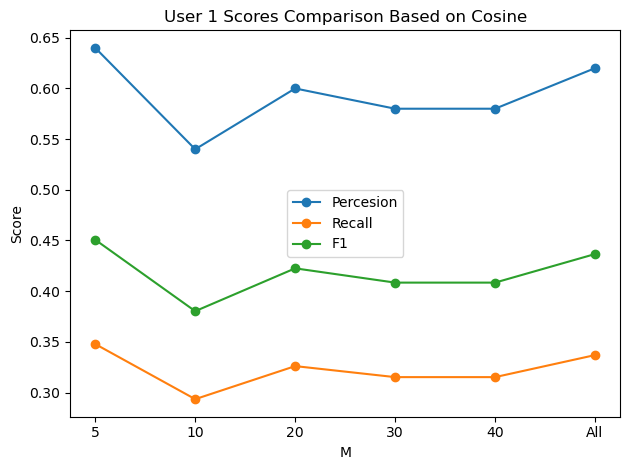

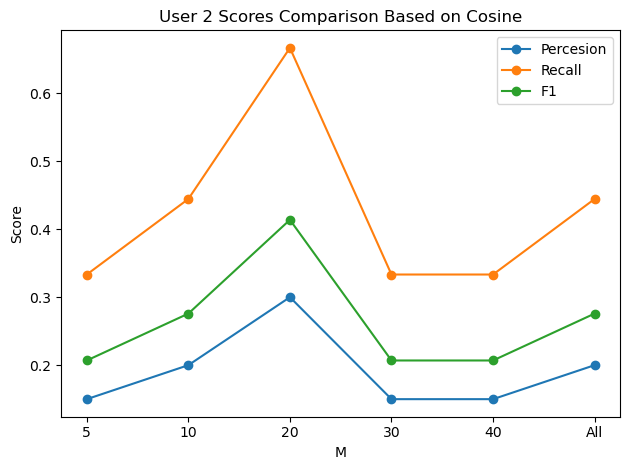

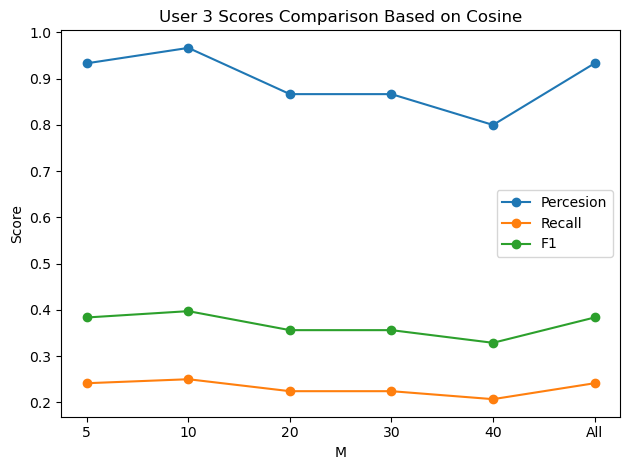

In [128]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

song_num = 10 # N songs per topic
# Recommendation Method

# Cosine similarity function
def recom_cosine(profile, test_data, N):
    recom_list = []
    for i in test_data.index:
        row = test_data.loc[i]
        topic = row["y_pred_lr"]
        if topic not in profile:
            continue
        tfv = tfv_dict[topic]
        song_tfv = tfv.transform([row["all_txt"]])
        prof_tfv = tfv.transform([" ".join(profile[topic])])
        score = cosine_similarity(song_tfv, prof_tfv)[0][0]
        recom_list.append((topic, i, score))
    recom_dict = {}
    for i in recom_list:
        topic, index, score = i
        if topic not in recom_dict:
            recom_dict[topic] = []
        recom_dict[topic].append((index, score))
    final_recom = []
    for i in recom_dict:
        cp = recom_dict[i]
        id_list = []
        sc_list = []
        for c in cp:
            id_list.append(c[0])
            sc_list.append(c[1])
        order = np.argsort(np.array(sc_list))[::-1]
        count = 0
        for j in order:
            if count < N:
                final_recom.append(id_list[j])
                count += 1
            else:
                break
    return final_recom

# Euclidean similarity function
def recom_euclidean(profile, test_data, N):
    recom_list = []
    for i in test_data.index:
        row = test_data.loc[i]
        topic = row["y_pred_lr"]
        if topic not in profile:
            continue
        tfv = tfv_dict[topic]
        song_tfv = tfv.transform([row["all_txt"]])
        prof_text = " ".join(profile[topic])
        user_tfv = tfv.transform([prof_text])
        dist_m = euclidean_distances(song_tfv, user_tfv)[0][0]
        score = 1 / (1 + dist_m)
        recom_list.append((topic, i, score))
    recom_dict = {}
    for i in recom_list:
        topic, index, score = i
        if topic not in recom_dict:
            recom_dict[topic] = []
        recom_dict[topic].append((index, score))
    final_recom = []
    for t in recom_dict:
        pair_list = recom_dict[t]
        id_list = []
        sc_list = []
        for p in pair_list:
            id_list.append(p[0])
            sc_list.append(p[1])
        order = np.argsort(np.array(sc_list))[::-1]
        count = 0
        for j in order:
            if count < N:
                final_recom.append(id_list[j])
                count += 1
            else:
                break
    return final_recom


# Dot product similarity function
def recom_dotprod(profile, test_data, N):
    recom_list = []
    for i in test_data.index:
        row = test_data.loc[i]
        topic = row["y_pred_lr"]
        if topic not in profile:
            continue
        tfv = tfv_dict[topic]
        song_tfv = tfv.transform([row["all_txt"]])
        prof_text = " ".join(profile[topic])
        user_tfv = tfv.transform([prof_text])
        dot_m = song_tfv.dot(user_tfv.T)
        score = dot_m.toarray()[0][0]
        recom_list.append((topic, i, score))
    recom_dict = {}
    for i in recom_list:
        topic, index, score = i
        if topic not in recom_dict:
            recom_dict[topic] = []
        recom_dict[topic].append((index, score))
    final_recom = []
    for t in recom_dict:
        pair_list = recom_dict[t]
        id_list = []
        sc_list = []
        for p in pair_list:
            id_list.append(p[0])
            sc_list.append(p[1])
        order = np.argsort(np.array(sc_list))[::-1]
        count = 0
        for j in order:
            if count < N:
                final_recom.append(id_list[j])
                count += 1
            else:
                break
    return final_recom

# Evaluation function
def eval_prf_func(recom_id, test_data, like_df):
    tp = 0
    rel = 0
    for i in test_data.index:
        row_val = test_data.loc[i]
        if like_check(row_val, like_df):
            rel = rel + 1
    for i in recom_id:
        row_val = test_data.loc[i]
        if like_check(row_val, like_df):
            tp = tp + 1
    if len(recom_id) > 0:
        p = tp / len(recom_id)
    else:
        p = 0
    if rel > 0:
        r = tp / rel
    else:
        r = 0
    if (p + r) > 0:
        f = 2 * p * r / (p + r)
    else:
        f = 0
    return p, r, f

# Main process
# Method: Cosine + Euclidean + Dot
# Compare various values for M
M_num = [5, 10, 20, 30, 40, None]
M_num_toshow = [5, 10, 20, 30, 40, "All"]
cos_p_u1 = []
cos_p_u2 = []
cos_p_u3 = []
cos_r_u1 = []
cos_r_u2 = []
cos_r_u3 = []
cos_f_u1 = []
cos_f_u2 = []
cos_f_u3 = []
for i in M_num:
    profile_u1 = build_profile(train_data, user1, i)
    profile_u2 = build_profile(train_data, user2, i)
    profile_u3 = build_profile(train_data, user3, i)
    print(f"[[Report (M = {"All" if i is None else i})]]:")
    
    # User 1
    recom_idx = recom_cosine(profile_u1, test_data, song_num)
    p, r, f = eval_prf_func(recom_idx, test_data, user1)
    cos_p_u1.append(p)
    cos_r_u1.append(r)
    cos_f_u1.append(f)
    print(f"User 1 Cosine Score:    [Percision] = {p:.3f}, [Recall] = {r:.3f}, [F1] = {f:.3f}")
    recom_idx = recom_euclidean(profile_u1, test_data, song_num)
    p, r, f = eval_prf_func(recom_idx, test_data, user1)
    print(f"User 1 Euclidean Score: [Percision] = {p:.3f}, [Recall] = {r:.3f}, [F1] = {f:.3f}")
    recom_idx = recom_dotprod(profile_u1, test_data, song_num)
    p, r, f = eval_prf_func(recom_idx, test_data, user1)
    print(f"User 1 Dot Score:       [Percision] = {p:.3f}, [Recall] = {r:.3f}, [F1] = {f:.3f}")
    
    # User 2
    recom_idx = recom_cosine(profile_u2, test_data, song_num)
    p, r, f = eval_prf_func(recom_idx, test_data, user2)
    cos_p_u2.append(p)
    cos_r_u2.append(r)
    cos_f_u2.append(f)
    print(f"\nUser 2 Cosine Score:    [Percision] = {p:.3f}, [Recall] = {r:.3f}, [F1] = {f:.3f}")
    recom_idx = recom_euclidean(profile_u2, test_data, song_num)
    p, r, f = eval_prf_func(recom_idx, test_data, user2)
    print(f"User 2 Euclidean Score: [Percision] = {p:.3f}, [Recall] = {r:.3f}, [F1] = {f:.3f}")
    recom_idx = recom_dotprod(profile_u2, test_data, song_num)
    p, r, f = eval_prf_func(recom_idx, test_data, user2)
    print(f"User 2 Dot Score:       [Percision] = {p:.3f}, [Recall] = {r:.3f}, [F1] = {f:.3f}")
    
    # User 3
    recom_idx = recom_cosine(profile_u3, test_data, song_num)
    p, r, f = eval_prf_func(recom_idx, test_data, user3)
    cos_p_u3.append(p)
    cos_r_u3.append(r)
    cos_f_u3.append(f)
    print(f"\nUser 3 Cosine Score:    [Percision] = {p:.3f}, [Recall] = {r:.3f}, [F1] = {f:.3f}")
    recom_idx = recom_euclidean(profile_u3, test_data, song_num)
    p, r, f = eval_prf_func(recom_idx, test_data, user3)
    print(f"User 3 Euclidean Score: [Percision] = {p:.3f}, [Recall] = {r:.3f}, [F1] = {f:.3f}")
    recom_idx = recom_dotprod(profile_u3, test_data, song_num)
    p, r, f = eval_prf_func(recom_idx, test_data, user3)
    print(f"User 3 Dot Score:       [Percision] = {p:.3f}, [Recall] = {r:.3f}, [F1] = {f:.3f}\n")

plt.figure()
plt.plot(M_num_toshow, cos_p_u1, label = "Percesion", marker = "o")
plt.plot(M_num_toshow, cos_r_u1, label = "Recall", marker = "o")
plt.plot(M_num_toshow, cos_f_u1, label = "F1", marker = "o")
plt.xlabel("M")
plt.ylabel("Score")
plt.title("User 1 Scores Comparison Based on Cosine")
plt.tight_layout()
plt.legend()
plt.show()

plt.figure()
plt.plot(M_num_toshow, cos_p_u2, label = "Percesion", marker = "o")
plt.plot(M_num_toshow, cos_r_u2, label = "Recall", marker = "o")
plt.plot(M_num_toshow, cos_f_u2, label = "F1", marker = "o")
plt.xlabel("M")
plt.ylabel("Score")
plt.title("User 2 Scores Comparison Based on Cosine")
plt.tight_layout()
plt.legend()
plt.show()

plt.figure()
plt.plot(M_num_toshow, cos_p_u3, label = "Percesion", marker = "o")
plt.plot(M_num_toshow, cos_r_u3, label = "Recall", marker = "o")
plt.plot(M_num_toshow, cos_f_u3, label = "F1", marker = "o")
plt.xlabel("M")
plt.ylabel("Score")
plt.title("User 3 Scores Comparison Based on Cosine")
plt.tight_layout()
plt.legend()
plt.show()

### Part 3:
#### Explanation and Real User Feedback
1. I decided to pick the metric scores of user1 from Part 2 to compare with those of week 4 real user. Both sets of scores are based on the Cosine Similarity model developed in Part 2 with a same M value of 20. According to the evaluation records, we can see that the real user has a higher percision score than user 1 (0.733 > 0.6), which means the real user has a higher hit rate and the recommendation are more effective. This is because, the real user's profile is built based on his actual liked songs, and it makes his profile has more typical keywords than user 1, which reduces noise. For the Recall, user1's score is obviously better than that of real user (0.326 > 0.222), indecating that the real user has more liked songs that are not recommended in week 4. It is also a signal that comparing to a simulation user, a real user's preference is more complex and diverse. In summary, the recommendation of user1 performs better than the real user based on their f1-scores (0.423 > 0.341).
2. According to the feedback of the real user, he mentioned that the recommendation performance is acceptable, and most recommended songs can effectively satisfy his preference. However, some songs' keywords can not match their topics well, which is kinda confusing. Also, many lyrics are not readable, which causes that it cannot represent the overall meaning of the song. He think the standard of song recommendation should not only depends on keywords, but also depends on the meaning of songs. Therefore, he suggested that we can make the lyrics readable, then the overall or partial meaning of songs can be a new feature for recommendation. It would be helpful to improve such song recommendation system.

Week 1 Song Samples: [67, 249, 230, 161, 91, 224, 58, 234, 180, 4]
Week 2 Song Samples: [409, 305, 284, 402, 371, 451, 386, 316, 457, 281]
Week 3 Song Samples: [512, 523, 670, 663, 547, 634, 642, 620, 565, 686]

All user liked songs from week 1 to 3: [249, 91, 180, 4, 305, 284, 457, 512, 634, 642, 686]

Real User Profile：
[personal]:
tonight, lose, let, mind, plan, livin, house, paradise, finally, build, japan, weapon, attraction, hotel, couple, home, action, lesson, heartbeat, think
[dark]:
dishonor, choir, death, aaah, realign, alter, slaughter, excuse, preach, demons, horn, dream, pile, flame, lord, streets, alive, reach, die, knees
[emotion]:
good, right, feel, ride, gonna, lazy, warriors, it, beat, moonshine, holy, toe, buy, carton, pack, dang, weekend, ghost, spot, smoke

Week 4 Recommendation: [959, 867, 778, 776, 926, 811, 940, 767, 849, 759, 780, 914, 978, 934, 784, 823, 754, 820, 832, 855, 770, 944, 969, 992, 910, 848, 838, 800, 899, 900]

Real User Likes: [959, 778, 776, 926

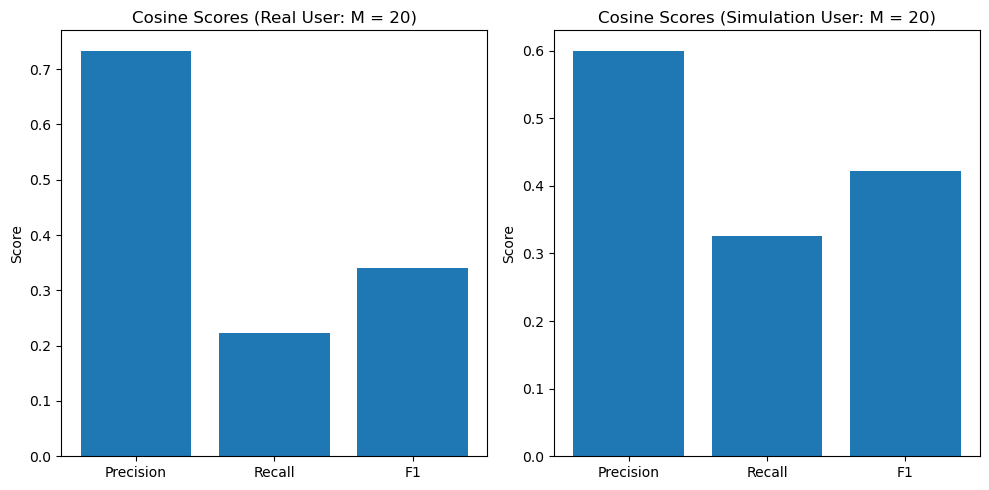

In [130]:
real_user_N  = 10
real_user_M = 20
np.random.seed(1)

# Week 1 Sampling

wk1_data = df[wk1_bl]
spl_1 = wk1_data.sample(real_user_N)
print(f"Week 1 Song Samples: {list(spl_1.index)}")

# Week 2 Sampling

wk2_data = df[wk2_bl]
spl_2 = wk2_data.sample(real_user_N)
print(f"Week 2 Song Samples: {list(spl_2.index)}")

# Week 3 Sampling

wk3_data = df[wk3_bl]
spl_3 = wk3_data.sample(real_user_N)
print(f"Week 3 Song Samples: {list(spl_3.index)}\n")

# [[ Enter real user preferences for week 1~3 songs here ]]
user_like_w1 = [249, 91, 180, 4]
user_like_w2 = [305, 284, 457]
user_like_w3 = [512, 634, 642, 686]
all_like_w123 = user_like_w1 + user_like_w2 + user_like_w3
print(f"All user liked songs from week 1 to 3: {all_like_w123}\n")

# Build Real User Profile for Processing the Recommendation Method from Part 2
def build_profile_real(data, idx_list, M):
    target_song = data.loc[idx_list]
    profile = {}
    tp_list = target_song["y_pred_lr"].unique()
    for t in tp_list:
        txt_list = []
        for j in target_song.index:
            if target_song.loc[j, "y_pred_lr"] == t:
                txt_list.append(target_song.loc[j, "all_txt"])
        tfv = tfv_dict[t]
        tfidf_m = tfv.transform(txt_list)
        score = tfidf_m.sum(axis = 0).A1
        to_ori = tfv.get_feature_names_out()
        sorted_item = np.argsort(score)[::-1]
        top_item = sorted_item[:M]
        top_list = []
        for j in top_item:
            top_list.append(to_ori[j])
        profile[t] = top_list
    return profile

fst_3week_data = df[wk1_3_bl].copy()
real_user_profile = build_profile_real(fst_3week_data, all_like_w123, real_user_M)

# Transfer to dataframe for reusing like_check
type_list = []
ky_list = []
for i, j in real_user_profile.items():
    type_list.append(i)
    ky_list.append(", ".join(j))
real_user_profile_df = pd.DataFrame({"topic": type_list, "keywords": ky_list})

# Print process
print("Real User Profile：")
for tpc in real_user_profile:
    print(f"[{tpc}]:")
    ky = ", ".join(real_user_profile[tpc])
    print(ky)

# Recommendation Process (using the cosine similarity recommendation model from part 2)
wk4_data = df[wk4_bl]
recom_record = recom_cosine(real_user_profile, wk4_data, real_user_N)
print(f"\nWeek 4 Recommendation: {recom_record}\n")

# Real User Hit Songs
hit_like = [959, 778, 776, 926, 767, 849, 759, 780, 914, 978, 934, 823, 754, 820, 832, 770, 969, 992, 910, 848, 838, 800]
print(f"Real User Likes: {hit_like}\n")

# User Liked Number of Songs from All Week 4 Songs
sim_like_wk4 = []
for i in wk4_data.index:
    if like_check(df.loc[i], real_user_profile_df):
        sim_like_wk4.append(i)
true_like_wk4 = len(sim_like_wk4)
print(f"Overall Liked Songs Count in week 4: {true_like_wk4}\n")

# Evaluation process
def eval_prf_real(reco_id, hit_like_idx, all_like_num):
    hit_len = len(hit_like_idx)
    if len(reco_id) > 0:
        p = hit_len / len(reco_id)
    else:
        p = 0
    if all_like_num > 0:
        r = hit_len / all_like_num
    else:
        r = 0
    if p + r > 0:
        f = 2 * p * r / (p + r)
    else:
        f = 0
    return p, r, f

# Simulation User1 Metric Scores (Picked User 1 for Comparision) (M = 20)
print("Part 2 User1 Cosine Scores (Simulation User: M = 20)")
print(f"Precision: {cos_p_u1[2]:.3f}")
print(f"Recall: {cos_r_u1[2]:.3f}")
print(f"F1-score: {cos_f_u1[2]:.3f}\n")
sim_sco_list = [cos_p_u1[2], cos_r_u1[2], cos_f_u1[2]]

# Real User Metric Scores (M = 20)
real_sco_list = eval_prf_real(recom_record, hit_like, true_like_wk4)
print("Week 4 Real User Cosine Scores (Real User: M = 20)")
print(f"Precision: {real_sco_list[0]:.3f}")
print(f"Recall: {real_sco_list[1]:.3f}")
print(f"F1-score: {real_sco_list[2]:.3f}")

# Diagram process
x_list = ["Precision", "Recall", "F1"]
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.bar(x_list, real_sco_list)
plt.title("Cosine Scores (Real User: M = 20)")
plt.ylabel("Score")
plt.subplot(1, 2, 2)
plt.bar(x_list, sim_sco_list)
plt.title("Cosine Scores (Simulation User: M = 20)")
plt.ylabel("Score")
plt.tight_layout()
plt.show()